In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
data_users = pd.read_table("ml-1m/users.dat", sep="::", engine="python", names=unames)
data_users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
data_ratings = pd.read_table("ml-1m/ratings.dat", sep="::", engine="python", names=rnames)
data_ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
mnames = ['movie_id', 'title', 'genre']
data_movies = pd.read_table("ml-1m/movies.dat", sep="::", engine="python", encoding="windows-1251", names=mnames)
data_movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [7]:
users_ratings_merge = data_users.merge(data_ratings, left_on='user_id', right_on='user_id')
users_ratings_merge

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291
...,...,...,...,...,...,...,...,...
1000204,6040,M,25,6,11106,1091,1,956716541
1000205,6040,M,25,6,11106,1094,5,956704887
1000206,6040,M,25,6,11106,562,5,956704746
1000207,6040,M,25,6,11106,1096,4,956715648


In [8]:
all_merged = users_ratings_merge.merge(data_movies, left_on='movie_id', right_on='movie_id')
all_merged

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [9]:
ratings_by_title = all_merged.groupby('title').size()
ratings_by_title.sort_values(ascending=False)
ratings_by_title

title
$1,000,000 Duck (1971)                           37
'Night Mother (1986)                             70
'Til There Was You (1997)                        52
'burbs, The (1989)                              303
...And Justice for All (1979)                   199
                                               ... 
Zed & Two Noughts, A (1985)                      29
Zero Effect (1998)                              301
Zero Kelvin (KjГЉrlighetens kjВЇtere) (1995)      2
Zeus and Roxanne (1997)                          23
eXistenZ (1999)                                 410
Length: 3706, dtype: int64

In [10]:
ages = data_users.age.unique()
genders = data_users.gender.unique()
ages = np.sort(ages)
ages

array([ 1, 18, 25, 35, 45, 50, 56])

In [11]:
age_pivot = all_merged.pivot_table('rating', index='title', columns=['age', 'gender'], aggfunc='sum')
pivot_age_gender = [
    age_pivot.filter(items=[(age, gender)]).sort_values(by=(age, gender), ascending=False) 
    for age in ages 
    for gender in genders
]
top10_by_age_and_gender = [table.head(10) for table in pivot_age_gender]
age_pivot

age                                            1           18            25  \
gender                                          F     M     F      M      F   
title                                                                         
$1,000,000 Duck (1971)                        NaN   NaN   5.0   13.0   10.0   
'Night Mother (1986)                          3.0   1.0   9.0    5.0   63.0   
'Til There Was You (1997)                     2.0   5.0  16.0    4.0   56.0   
'burbs, The (1989)                            NaN   9.0  85.0  207.0   94.0   
...And Justice for All (1979)                 NaN   3.0   NaN   24.0   34.0   
...                                           ...   ...   ...    ...    ...   
Zed & Two Noughts, A (1985)                   NaN   1.0   3.0    NaN   10.0   
Zero Effect (1998)                            9.0  24.0  32.0  201.0  107.0   
Zero Kelvin (KjГЉrlighetens kjВЇtere) (1995)  NaN   NaN   NaN    NaN    NaN   
Zeus and Roxanne (1997)                       1.0   8.0   5.0    5.0   12.0   
eXistenZ (1999)                               4.0  40.0  38.0  235.0  105.0   

age                                                    35           45        \
gender                                            M     F      M     F     M   
title                                                                          
$1,000,000 Duck (1971)                         24.0  29.0   18.0   NaN   2.0   
'Night Mother (1986)                           26.0  21.0   40.0  15.0   8.0   
'Til There Was You (1997)                       8.0   9.0   20.0   5.0   2.0   
'burbs, The (1989)                            211.0  49.0  106.0   6.0  22.0   
...And Justice for All (1979)                 182.0  45.0  211.0  20.0  62.0   
...                                             ...   ...    ...   ...   ...   
Zed & Two Noughts, A (1985)                    44.0  15.0   19.0   NaN   4.0   
Zero Effect (1998)                            428.0  44.0  122.0  16.0  48.0   
Zero Kelvin (KjГЉrlighetens kjВЇtere) (1995)    NaN   NaN    7.0   NaN   NaN   
Zeus and Roxanne (1997)                         5.0   7.0   14.0   NaN   1.0   
eXistenZ (1999)                               487.0  37.0  212.0  22.0  65.0   

age                                             50          56        
gender                                           F     M     F     M  
title                                                                 
$1,000,000 Duck (1971)                        10.0   1.0   NaN   NaN  
'Night Mother (1986)                          11.0  21.0   NaN  13.0  
'Til There Was You (1997)                      5.0   NaN   6.0   2.0  
'burbs, The (1989)                            22.0  55.0   1.0  15.0  
...And Justice for All (1979)                 22.0  81.0  13.0  42.0  
...                                            ...   ...   ...   ...  
Zed & Two Noughts, A (1985)                    NaN   3.0   NaN   NaN  
Zero Effect (1998)                            13.0  56.0   7.0  22.0  
Zero Kelvin (KjГЉrlighetens kjВЇtere) (1995)   NaN   NaN   NaN   NaN  
Zeus and Roxanne (1997)                        NaN   NaN   NaN   NaN  
eXistenZ (1999)                               14.0  65.0   NaN  11.0  

[3706 rows x 14 columns]

In [12]:
rating_by_sex = all_merged.pivot_table('rating', index='title', columns='gender', aggfunc='sum')
rating_for_M = rating_by_sex.filter(items='M')
rating_for_F = rating_by_sex.filter(items='F')
top10_for_M = rating_for_M.sort_values(by='M', ascending=False).head(10)
top10_for_F = rating_for_F.sort_values(by='F', ascending=False).head(10)
rating_by_sex

gender,F,M
title,,
"$1,000,000 Duck (1971)",54.0,58.0
'Night Mother (1986),122.0,114.0
'Til There Was You (1997),99.0,41.0
"'burbs, The (1989)",257.0,625.0
...And Justice for All (1979),134.0,605.0
...,...,...
"Zed & Two Noughts, A (1985)",28.0,71.0
Zero Effect (1998),228.0,901.0
Zero Kelvin (KjГЉrlighetens kjВЇtere) (1995),NaN,7.0


<AxesSubplot:xlabel='How male rated the films', ylabel='Title'>

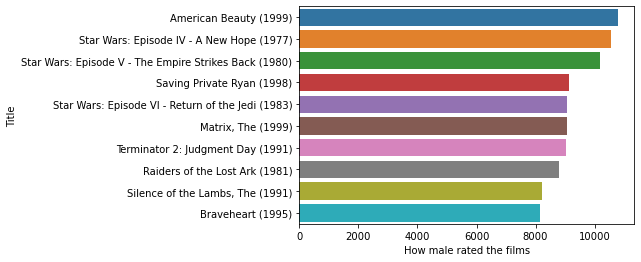

In [15]:
pl_M = sns.barplot(data=top10_for_M, y = top10_for_M.index, x = 'M')
pl_M.set_xlabel('How male rated the films')
pl_M.set_ylabel('Title')
pl_M

<AxesSubplot:xlabel='How women rated the films', ylabel='Title'>

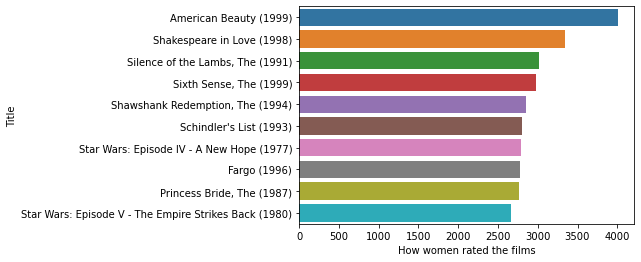

In [16]:
pl_F = sns.barplot(data=top10_for_F, y = top10_for_F.index, x='F')
pl_F.set(xlabel='How women rated the films', ylabel='Title')
pl_F

[Text(0.5, 0, 'How rated women of age 1'), Text(0, 0.5, 'Title')]

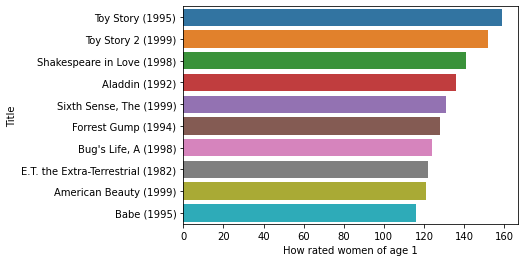

In [18]:
table=top10_by_age_and_gender[0]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 1'), Text(0, 0.5, 'Title')]

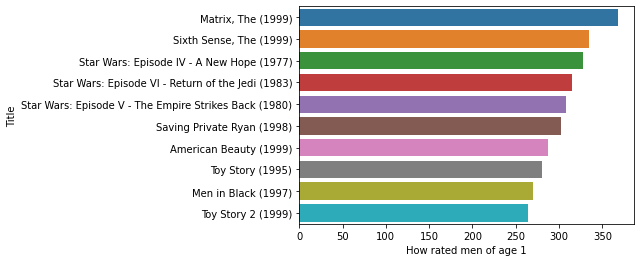

In [19]:
table=top10_by_age_and_gender[1]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 18'), Text(0, 0.5, 'Title')]

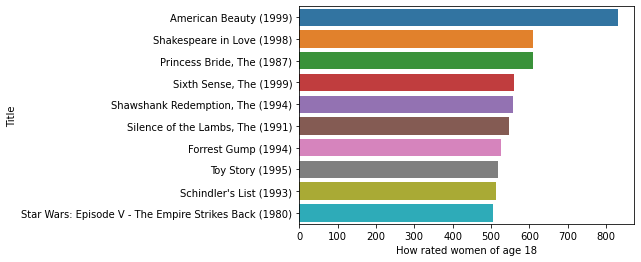

In [20]:
table=top10_by_age_and_gender[2]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 18'), Text(0, 0.5, 'Title')]

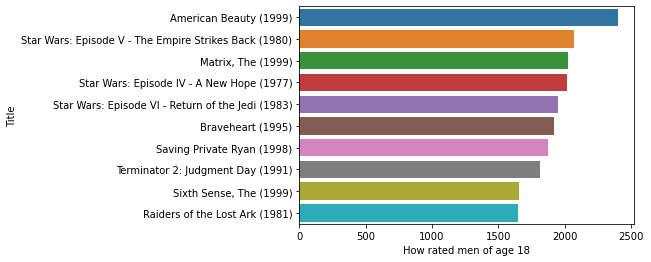

In [21]:
table=top10_by_age_and_gender[3]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 25'), Text(0, 0.5, 'Title')]

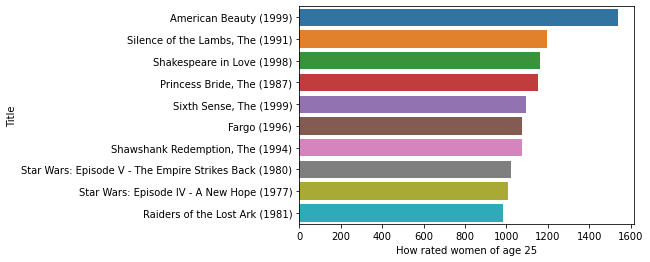

In [22]:
table=top10_by_age_and_gender[4]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 25'), Text(0, 0.5, 'Title')]

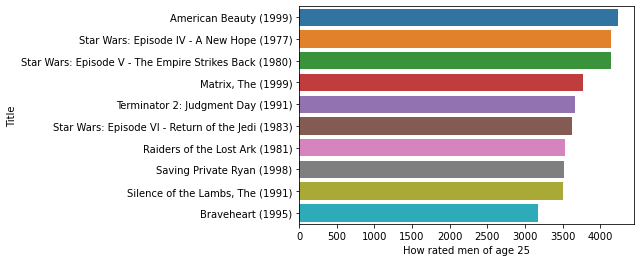

In [23]:
table=top10_by_age_and_gender[5]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 35'), Text(0, 0.5, 'Title')]

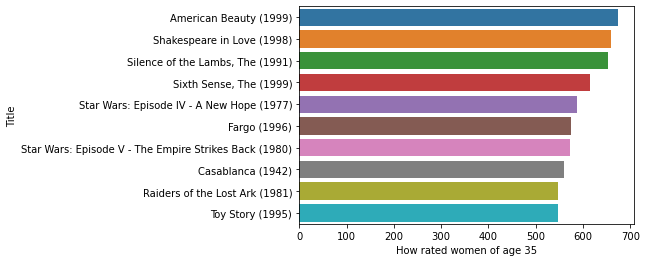

In [24]:
table=top10_by_age_and_gender[6]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 35'), Text(0, 0.5, 'Title')]

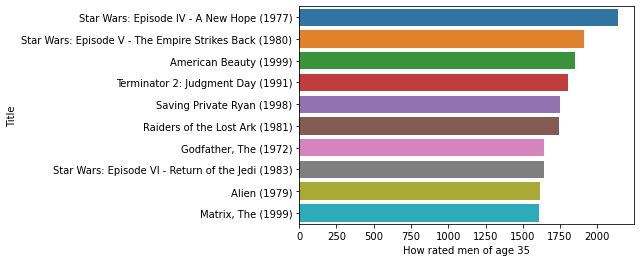

In [25]:
table=top10_by_age_and_gender[7]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 45'), Text(0, 0.5, 'Title')]

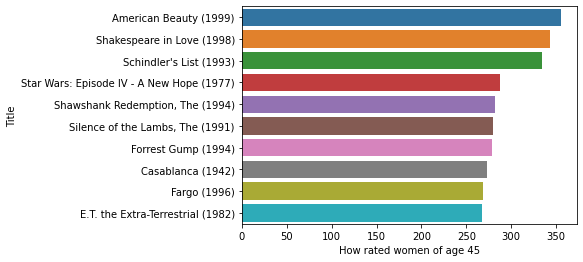

In [26]:
table=top10_by_age_and_gender[8]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 45'), Text(0, 0.5, 'Title')]

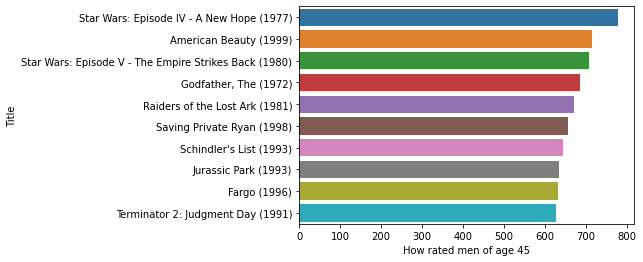

In [27]:
table=top10_by_age_and_gender[9]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 50'), Text(0, 0.5, 'Title')]

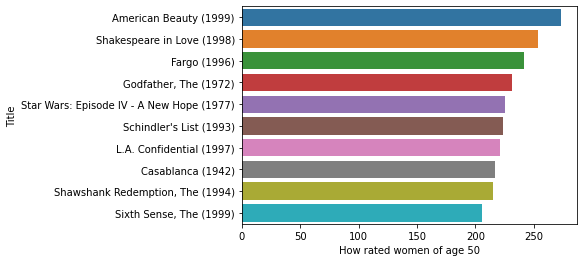

In [28]:
table=top10_by_age_and_gender[10]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 50'), Text(0, 0.5, 'Title')]

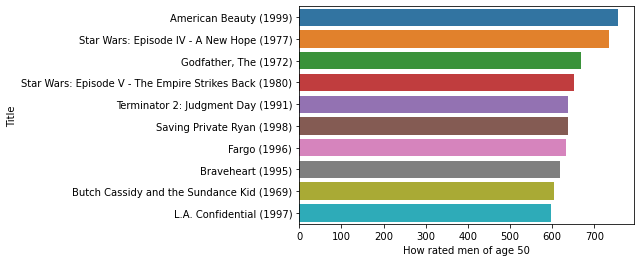

In [29]:
table=top10_by_age_and_gender[11]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated women of age 56'), Text(0, 0.5, 'Title')]

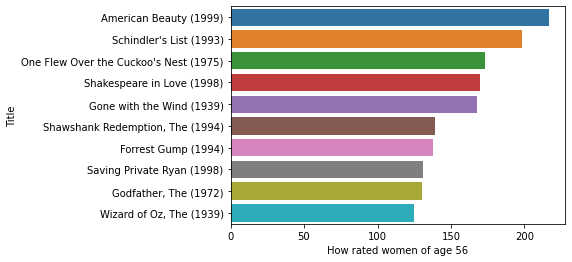

In [30]:
table=top10_by_age_and_gender[12]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')

[Text(0.5, 0, 'How rated men of age 56'), Text(0, 0.5, 'Title')]

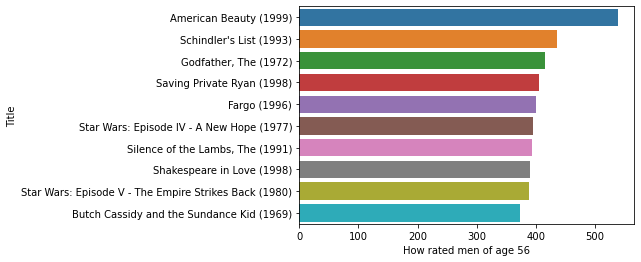

In [31]:
table=top10_by_age_and_gender[13]
plot = sns.barplot(data=table, y = table.index, x=table.columns[0])
plot.set(xlabel=f"How rated {('women' if table.columns[0][1] == 'F' else 'men')} of age {table.columns[0][0]}",
           ylabel = 'Title')